In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

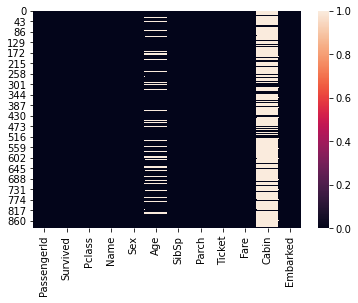

In [7]:
sns.heatmap(data.isna())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

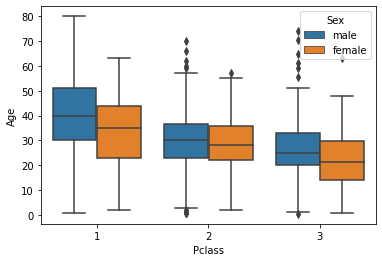

In [13]:
sns.boxplot(data=data,x='Pclass',y='Age',hue='Sex')

In [14]:
mean_Age_Pclass1 = np.round(data[data['Pclass']==1]['Age'].mean())
mode_Age_Pclass2 = data[data['Pclass']==2]['Age'].mode()[0]
mode_Age_Pclass3 = data[data['Pclass']==3]['Age'].mode()[0]

In [15]:
mean_Age_Pclass1

38.0

In [16]:
mode_Age_Pclass2

24.0

In [17]:
mode_Age_Pclass3

22.0

In [19]:
# Age data cleaning function.
def fill_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return mean_Age_Pclass1
        elif Pclass == 2:
            return mode_Age_Pclass2
        else:
            return mode_Age_Pclass3
    else:
        return Age

In [20]:
data[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [21]:
data['Age'] = data[['Age','Pclass']].apply(fill_age,axis=1)

In [22]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
data.drop('Cabin',axis=1,inplace=True)

In [31]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [32]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [33]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
data['SibSp'].nunique()

7

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

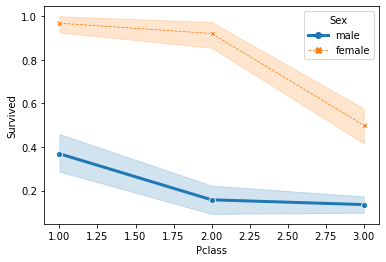

In [52]:
sns.lineplot(data=data,x='Pclass',y='Survived',hue='Sex',size='Sex',style='Sex',markers=True,legend=
            'auto')